In [10]:
import os
from pathlib import Path
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
cwd = os.getcwd()

proj_dir = Path(cwd).parent

os.chdir(proj_dir)

In [6]:
from utils.bathymetry import generate_schematized_bathymetry

In [9]:
load_path = Path("database/transects/")

x0 = np.loadtxt(os.path.join(load_path, 'x0.txt'))
x1 = np.loadtxt(os.path.join(load_path, 'x1.txt'))
x2 = np.loadtxt(os.path.join(load_path, 'x2.txt'))
x3 = np.loadtxt(os.path.join(load_path, 'x3.txt'))

z0 = np.loadtxt(os.path.join(load_path, 'z0.txt'))
z1 = np.loadtxt(os.path.join(load_path, 'z1.txt'))
z2 = np.loadtxt(os.path.join(load_path, 'z2.txt'))
z3 = np.loadtxt(os.path.join(load_path, 'z3.txt'))

xgr = np.loadtxt(os.path.join(load_path, "x_data.grd"))
zgr = np.loadtxt(os.path.join(load_path, "bed_data.dep"))

In [13]:
def read_config(config_file_path):
    '''
    Creates configuration variables from file
    ------
    config_file: .yaml file
        file containing dictionary with dataset creation information
    ''' 

    class AttrDict(dict):
        """
        This class is used to make it easier to work with dictionaries and allows 
        values to be called similar to attributes
        """
        def __init__(self, *args, **kwargs):
            super(AttrDict, self).__init__(*args, **kwargs)
            self.__dict__ = self
                                
    with open(config_file_path) as f:
        cfg = yaml.safe_load(f)
        
    config = AttrDict(cfg)
            
    for key in cfg:
        config[key] = AttrDict(cfg[key])
            
    return config

### ENTER RUNID TO BE CONSIDERED HERE

In [16]:
RUNID = "run0"

In [17]:
config_file_path = os.path.join("runs/", RUNID + "/", "config.yaml")

config = read_config(config_file_path)

In [18]:
x_schem, z_schem = generate_schematized_bathymetry(
    bluff_flat_length=config.bathymetry.bluff_flat_length,

    bluff_height=config.bathymetry.bluff_height, 
    bluff_slope=config.bathymetry.bluff_slope,
    
    beach_width=config.bathymetry.beach_width, 
    beach_slope=config.bathymetry.beach_slope,
    
    nearshore_max_depth=config.bathymetry.nearshore_max_depth, 
    nearshore_slope=config.bathymetry.nearshore_slope,
    
    offshore_max_depth=config.bathymetry.offshore_max_depth, 
    offshore_slope=config.bathymetry.offshore_slope,
    
    contintental_flat_width=config.bathymetry.continental_flat_width,
    
    with_artificial=config.bathymetry.with_artificial,
    artificial_max_depth=config.bathymetry.artificial_max_depth,
    artificial_slope=config.bathymetry.artificial_slope,
    
    N=config.bathymetry.N
)

We can now easily compare schematized bathymetry with real bathymetry and an entire transect including bluff and beach.

In [29]:
# for entire bathymetry
i_xgr = np.argmin(np.abs(zgr))

# for single transects
i_x_start = np.argmin(np.abs(z_schem - z0[0]))

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_54428\2085994871.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


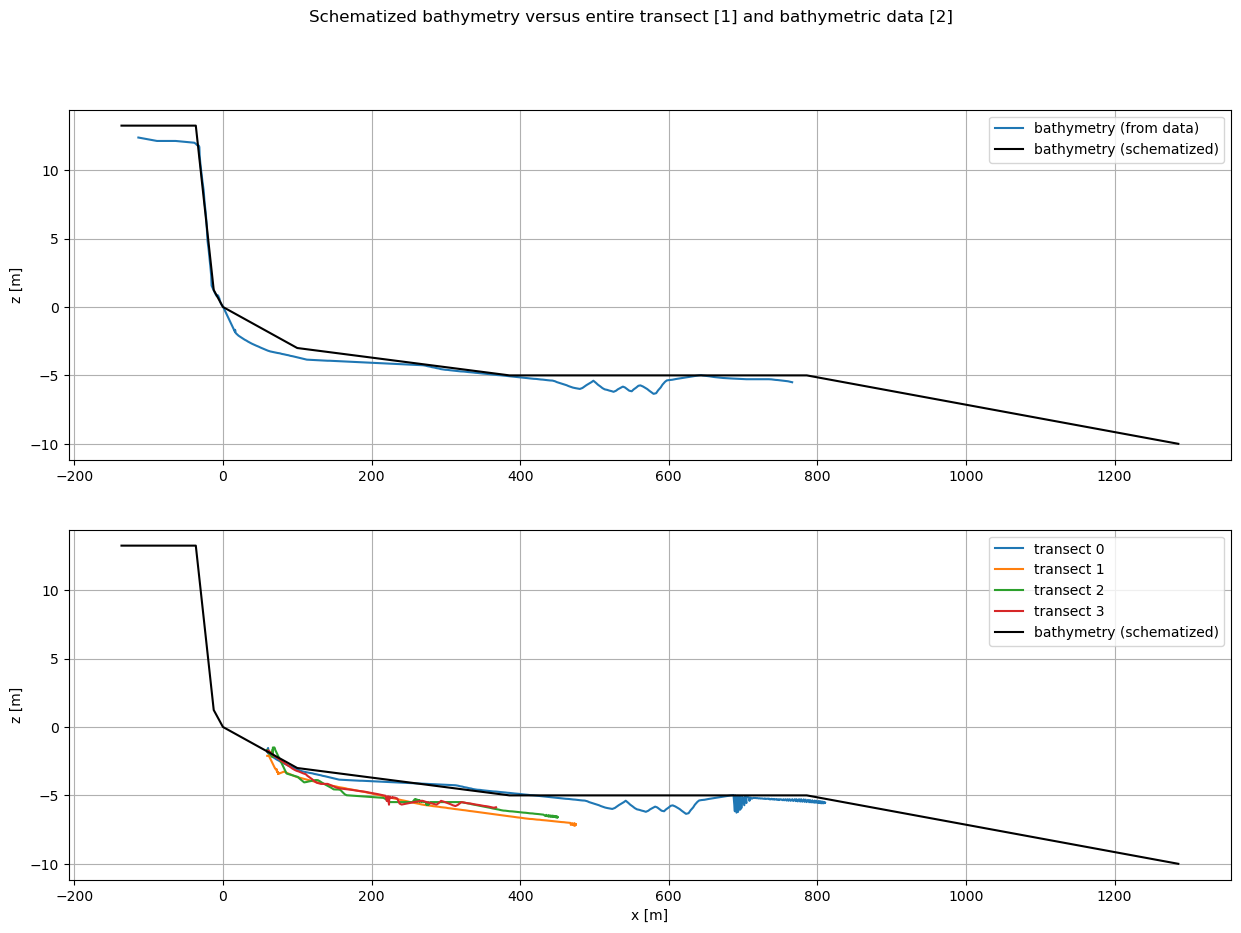

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

axs[0].plot(xgr - xgr[i_xgr], zgr, label='bathymetry (from data)')
axs[0].plot(x_schem, z_schem, color='k', label='bathymetry (schematized)')

axs[1].plot(x0 + x_schem[i_x_start], z0, label='transect 0')
axs[1].plot(x1 + x_schem[i_x_start], z1, label='transect 1')
axs[1].plot(x2 + x_schem[i_x_start], z2, label='transect 2')
axs[1].plot(x3 + x_schem[i_x_start], z3, label='transect 3')
axs[1].plot(x_schem, z_schem, color='k', label='bathymetry (schematized)')

axs[1].set_xlabel("x [m]")

axs[0].set_ylabel("z [m]")
axs[1].set_ylabel("z [m]")

axs[0].legend()
axs[1].legend()

axs[0].grid()
axs[1].grid()

fig.suptitle("Schematized bathymetry versus entire transect [1] and bathymetric data [2]")

fig.show()